In [1]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
import pydotplus
import h5py

import theano
import tensorflow
import keras

print('scipy' + scipy.__version__)
print('numpy' + numpy.__version__)
print('matplotlib' + matplotlib.__version__)
print('pandas' + pandas.__version__)
print('sklearn' + sklearn.__version__)
print('h5py' + h5py.__version__)
print('theano' + theano.__version__)
print('keras' + keras.__version__)
print('tensorflow' + tensorflow.__version__)


scipy1.4.1
numpy1.18.1
matplotlib3.1.3
pandas1.0.3
sklearn0.22.1
h5py2.10.0
theano1.0.4
keras2.3.1
tensorflow2.1.0


Using TensorFlow backend.


In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') /255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_matrics :' + str(loss_and_metrics))


Epoch 1/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.6815 - accuracy: 0.8232
Epoch 2/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3511 - accuracy: 0.9014
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3040 - accuracy: 0.9144
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.2749 - accuracy: 0.9231
Epoch 5/5
10000/10000 [==============================] - 0s 8us/step
loss_and_matrics :[0.2391603475302458, 0.9322999715805054]


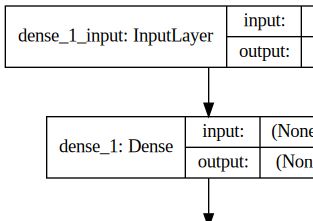

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')